In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance
import riskfolio as rp
from prophet import Prophet
from typing import List
from functions import *

In [27]:
stocks: List[str] = ["AAPL","MSFT","GOOG","TSLA"] # List of stocks in the desired portfolio
historical_period: str = "5y" # Period to look back in the history of prices. Can be set like 1m, 3m for months; 1y,3y for years or max for all available. Default = 5y
future_period: int = 365 # Forecasting period in days. Keep in mind longer the period less accurate the results
current_dictionary = {}
future_dictionary = {}

In [29]:
for stock in stocks:
    current_dictionary[stock] = get_current_prices(stock,historical_period)
    future_dictionary[stock] = get_future_prices(current_dictionary[stock],future_period)
    
    

[*********************100%***********************]  1 of 1 completed

15:58:40 - cmdstanpy - INFO - Chain [1] start processing


15:58:40 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

15:58:41 - cmdstanpy - INFO - Chain [1] start processing


15:58:41 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

15:58:43 - cmdstanpy - INFO - Chain [1] start processing


15:58:43 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

15:58:44 - cmdstanpy - INFO - Chain [1] start processing


15:58:44 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
current_portfolio = pd.DataFrame()
for i,stock in enumerate(stocks):
    if i == 0:
        data = pd.DataFrame.from_dict(current_dictionary[stock])
        data = data.rename(columns={"y":f"{stock}"})
        current_portfolio = pd.concat([current_portfolio,data],axis=1)       
    else:
        data = pd.DataFrame.from_dict(current_dictionary[stock])
        data = data.drop("ds",axis=1,errors="ignore")
        data = data.rename(columns={"y":f"{stock}"})
        current_portfolio = pd.concat([current_portfolio,data],axis=1)
current_portfolio = current_portfolio.set_index('ds')
current_portfolio

current_estimate = estimate_portfolio(current_portfolio)
current_plot = plot_portfolio(current_estimate)

,AAPL,MSFT,GOOG,TSLA
ds,,,,
2018-01-08,41.447353,83.134567,55.347000,22.427334
2018-01-09,41.442593,83.078087,55.313000,22.246000
2018-01-10,41.433075,82.701385,55.130501,22.320000
2018-01-11,41.668419,82.946243,55.276001,22.530001
2018-01-12,42.098705,84.377632,56.112999,22.414667
...,...,...,...,...
2022-12-30,129.929993,239.820007,88.730003,123.180000
2023-01-03,125.070000,239.580002,89.699997,108.099998
2023-01-04,126.360001,229.100006,88.709999,113.639999


In [31]:
future_portfolio = pd.DataFrame()
for i,stock in enumerate(stocks):
    if i == 0:
        data = pd.DataFrame.from_dict(future_dictionary[stock])
        data = data.rename(columns={"yhat":f"{stock}"})
        future_portfolio = pd.concat([future_portfolio,data],axis=1)       
    else:
        data = pd.DataFrame.from_dict(future_dictionary[stock])
        data = data.drop("ds",axis=1,errors="ignore")
        data = data.rename(columns={"yhat":f"{stock}"})
        future_portfolio = pd.concat([future_portfolio,data],axis=1)
future_portfolio = future_portfolio.set_index("ds")
future_portfolio

future_estimate = estimate_portfolio(future_portfolio)
future_plot = plot_portfolio(future_estimate)

,AAPL,MSFT,GOOG,TSLA
ds,,,,
2018-01-08,41.727432,87.421509,53.562278,33.725630
2018-01-09,41.832540,86.873907,53.574447,33.937534
2018-01-10,41.924402,86.716549,53.759953,35.274854
2018-01-11,41.798397,86.093517,53.778860,35.797561
2018-01-12,41.710442,85.721892,53.745168,36.013224
...,...,...,...,...
2024-01-02,110.020291,139.840112,34.780604,36.591651
2024-01-03,109.977285,139.380263,34.793784,38.055759
2024-01-04,109.717436,138.389644,34.635406,38.883840


                AAPL      MSFT      GOOG      TSLA
ds                                                
2018-01-09 -0.000115 -0.000679 -0.000614 -0.008085
2018-01-10 -0.000230 -0.004534 -0.003299  0.003326
2018-01-11  0.005680  0.002961  0.002639  0.009409
2018-01-12  0.010326  0.017257  0.015142 -0.005119
2018-01-16 -0.005082 -0.013951 -0.000445  0.011421
...              ...       ...       ...       ...
2022-12-30  0.002469 -0.004938 -0.002473  0.011164
2023-01-03 -0.037405 -0.001001  0.010932 -0.122422
2023-01-04  0.010314 -0.043743 -0.011037  0.051249
2023-01-05 -0.010605 -0.029638 -0.021869 -0.029039
2023-01-06  0.008559 -0.010751 -0.010026 -0.042505

[1258 rows x 4 columns]


c:\Users\sedat\anaconda3\envs\finpred\lib\site-packages\riskfolio\src\PlotFunctions.py:605: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


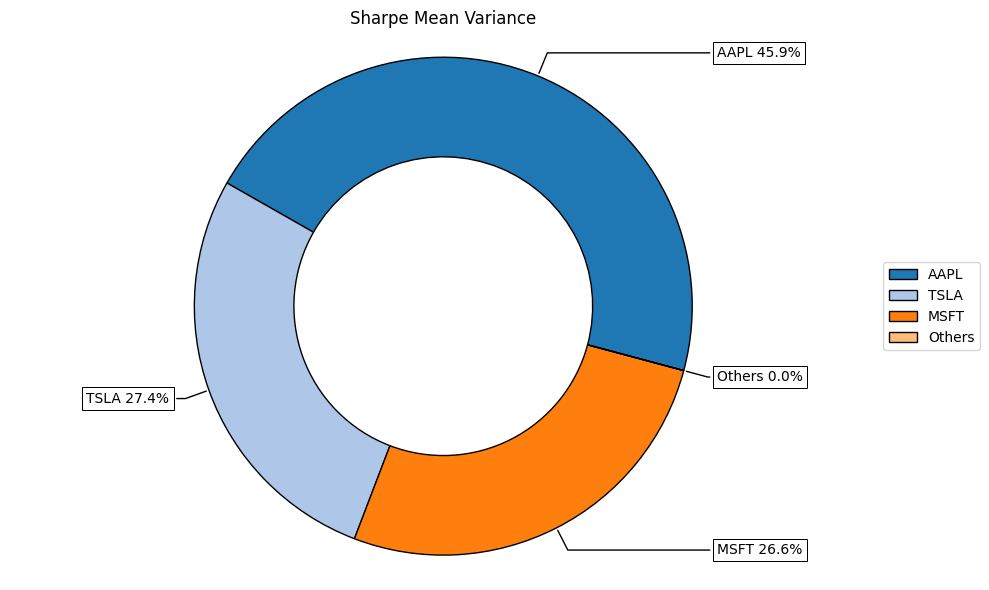

                AAPL      MSFT      GOOG      TSLA
ds                                                
2018-01-09  0.002519 -0.006264  0.000227  0.006283
2018-01-10  0.002196 -0.001811  0.003463  0.039405
2018-01-11 -0.003006 -0.007185  0.000352  0.014818
2018-01-12 -0.002104 -0.004317 -0.000626  0.006025
2018-01-16  0.014801 -0.015344  0.001284  0.065959
...              ...       ...       ...       ...
2024-01-02 -0.000291 -0.005598 -0.004477  0.003944
2024-01-03 -0.000391 -0.003288  0.000379  0.040012
2024-01-04 -0.002363 -0.007107 -0.004552  0.021760
2024-01-05 -0.002024 -0.005818 -0.006266  0.017468
2024-01-06  0.009104 -0.032973  0.009448  0.088718

[1623 rows x 4 columns]


c:\Users\sedat\anaconda3\envs\finpred\lib\site-packages\riskfolio\src\PlotFunctions.py:605: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


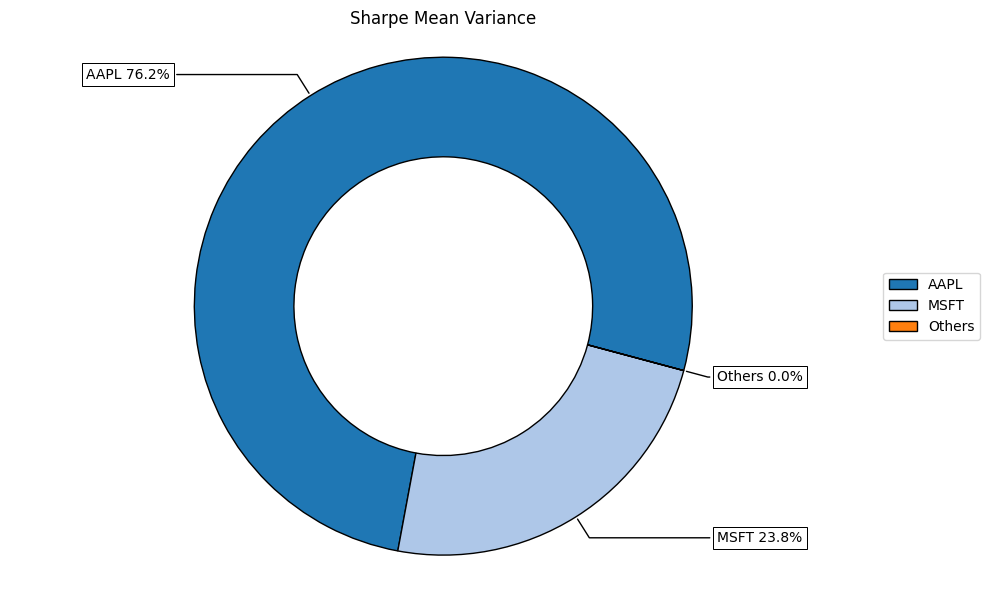